In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [71]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [72]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

C:\Users\chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

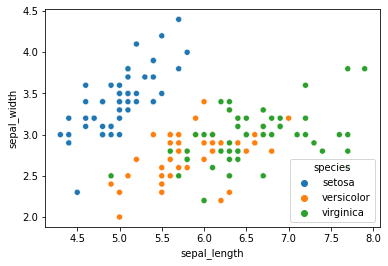

In [108]:
sns.scatterplot(data['sepal_length'], data['sepal_width'], hue=data['species'])

C:\Users\chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

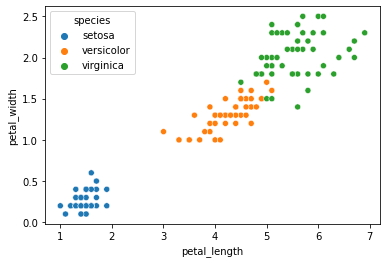

In [112]:
sns.scatterplot(data['petal_length'], data['petal_width'], hue=data['species'])

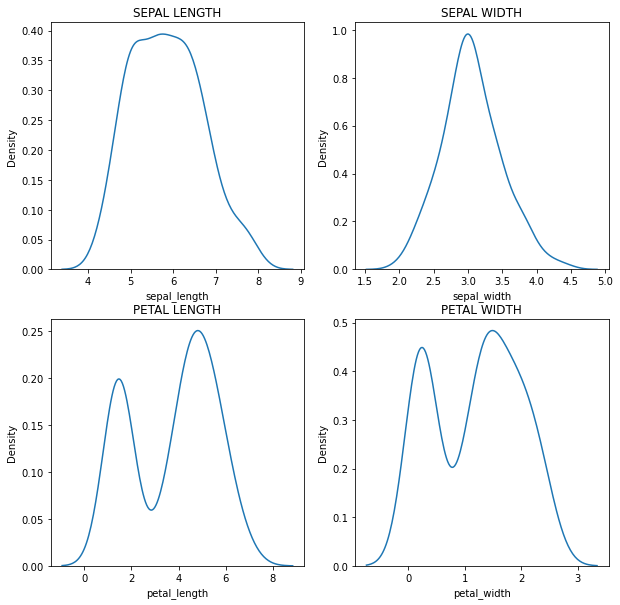

In [146]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.kdeplot(data['sepal_length'])
plt.title('SEPAL LENGTH')

plt.subplot(2,2,2)
sns.kdeplot(data['sepal_width'])
plt.title('SEPAL WIDTH')

plt.subplot(2,2,3)
sns.kdeplot(data['petal_length'])
plt.title('PETAL LENGTH')

plt.subplot(2,2,4)
sns.kdeplot(data['petal_width'])
plt.title('PETAL WIDTH')

plt.show()

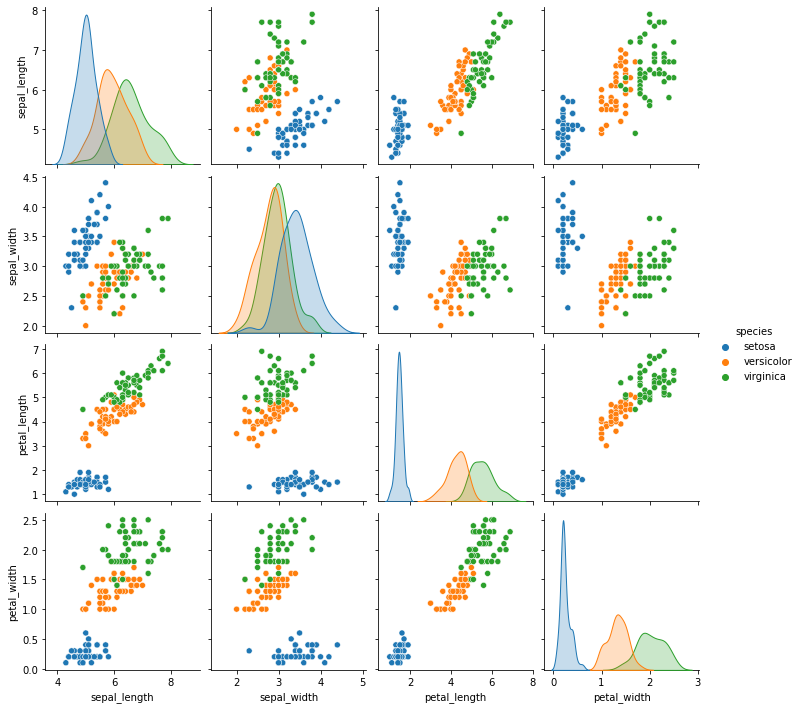

In [122]:
sns.pairplot(data, hue='species')

### Data Preprocessing:

In [147]:
data = data[data['species'] != 'setosa']

In [148]:
data['species']=data['species'].map({'versicolor':0, 'virginica':1})

C:\Users\chait\AppData\Local\Temp\ipykernel_21396\737688201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species']=data['species'].map({'versicolor':0, 'virginica':1})


In [149]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [150]:
data['species'].value_counts()

0    50
1    50
Name: species, dtype: int64

In [151]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [152]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [153]:
y.head()

50    0
51    0
52    0
53    0
54    0
Name: species, dtype: int64

In [173]:
from sklearn import set_config
set_config(display='diagram')

### Train Test Split

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)
X_train.shape, X_test.shape

((70, 4), (30, 4))

### Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
lg = LogisticRegression()

In [178]:
lg.fit(X_train, y_train)

LogisticRegression()

In [179]:
lg_pred = lg.predict(X_test)
lg_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [180]:
from sklearn.metrics import accuracy_score, classification_report

In [181]:
accuracy_score(lg_pred, y_test)

0.9333333333333333

In [182]:
print(classification_report(lg_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Hyperparameter tunning and Cross Validation:

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
# Hyperparameters
param = {'penalty':['l1','l2','elasticnet'], 'C':[1,2,5,4,7,23,10,30,45,78,], 'max_iter':[80,100,200,300]}

In [185]:
# Cross Validation
classifier_reg = GridSearchCV(lg, param_grid=param, scoring='accuracy', cv=5)

In [186]:
classifier_reg.fit(X_train, y_train)

C:\Users\chait\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chait\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chait\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\chait\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 4, 7, 23, 10, 30, 45, 78],
                         'max_iter': [80, 100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [188]:
classifier_reg.best_params_

{'C': 45, 'max_iter': 80, 'penalty': 'l2'}

In [189]:
classifier_reg.best_score_

0.9857142857142858

In [190]:
# Prediction
y_pred = classifier_reg.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [191]:
# Accuracy
accuracy_score(y_pred, y_test)

0.9333333333333333

In [192]:
# Performance metric report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



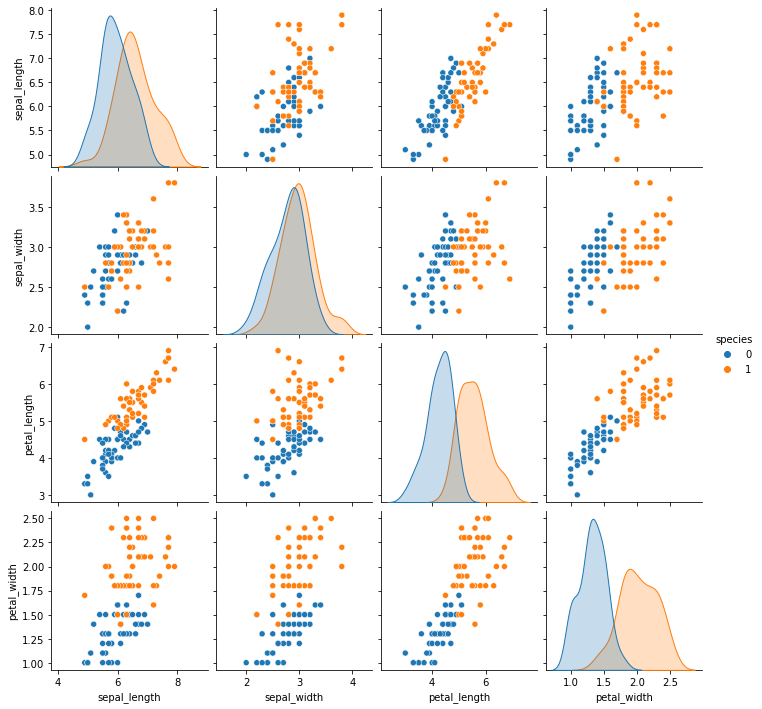

In [196]:
sns.pairplot(data, hue='species')